In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tsa_file = "tsa_data_24Jan.csv"
tsa_df = pd.read_csv(tsa_file)
tsa_df.head()

,date,2021,2020,2019
0,1-Jan,805990.0,2311732.0,2126398.0
1,2-Jan,1192881.0,2178656.0,2345103.0
2,3-Jan,1327289.0,2422272.0,2202111.0
3,4-Jan,1080346.0,2210542.0,2150571.0
4,5-Jan,766594.0,1806480.0,1975947.0


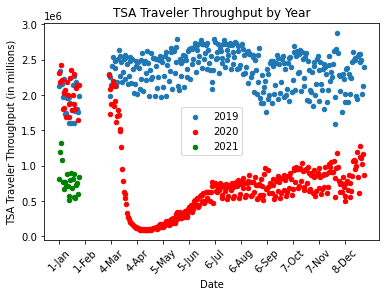

In [28]:
ax = tsa_df.plot(kind="scatter",x='date',y='2019',label='2019')
tsa_df.plot(kind="scatter",x='date',y='2020',label='2020',color='Red',ax=ax)
tsa_df.plot(kind="scatter",x='date',y='2021',label='2021',color='green',ax=ax)

plt.xticks(np.arange(0,len(tsa_df['date']), 31),rotation=45)
plt.ylabel("TSA Traveler Throughput (in millions)")
plt.xlabel("Date")
plt.title("TSA Traveler Throughput by Year")
plt.show()

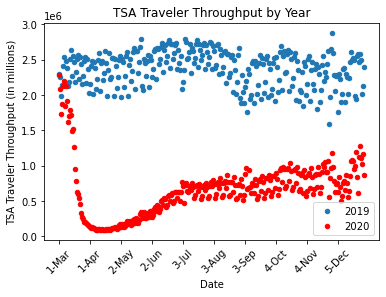

In [27]:
start_index = tsa_df[tsa_df['date'].str.contains("1-Mar")==True].index[0]
end_index = tsa_df[tsa_df['date'].str.contains("31-Dec")==True].index[0]

mar_dec = tsa_df[start_index:end_index+1]

ax1 = mar_dec.plot(kind="scatter",x='date',y='2019',label='2019')
mar_dec.plot(kind="scatter",x='date',y='2020',label='2020',color='Red',ax=ax1)

plt.xticks(np.arange(0,len(mar_dec['date']), 31),rotation=45)
plt.ylabel("TSA Traveler Throughput (in millions)")
plt.xlabel("Date")
plt.title("TSA Traveler Throughput by Year")
plt.show()

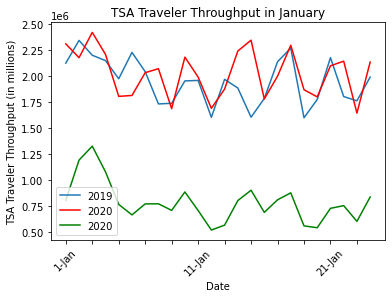

In [12]:
start_index = tsa_df[tsa_df['date'].str.contains("1-Jan")==True].index[0]
end_index = tsa_df[tsa_df['date'].str.contains("24-Jan")==True].index[0]

jan = tsa_df[start_index:end_index+1]

ax2 = jan.plot(kind="line",x='date',y='2019',label='2019')
jan.plot(kind="line",x='date',y='2020',label='2020',color='Red',ax=ax2)
jan.plot(kind="line",x='date',y='2021',label='2020',color='green',ax=ax2)

plt.xticks(np.arange(0,len(jan['date']), 2),rotation=45)
plt.ylabel("TSA Traveler Throughput (in millions)")
plt.xlabel("Date")
plt.title("TSA Traveler Throughput in January")
plt.show()